In [231]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix

import warnings
warnings.filterwarnings('ignore')


In [232]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [233]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [234]:
df.duplicated().sum()

0

In [235]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [236]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [237]:
#Southampton, Cherbourg, and Queenstown
#survival - Survival (0 = No; 1 = Yes)
#class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
#name - Name
#sex - Sex
#age - Age
#sibsp - Number of Siblings/Spouses Aboard
#parch - Number of Parents/Children Aboard
#ticket - Ticket Number
#fare - Passenger Fare
#cabin - Cabin
#embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
#boat - Lifeboat (if survived)
#body - Body number (if did not survive and body was recovered)

In [238]:
#df['Embarked](df['Embarked'] == "S").replace = 'Southampton'

Changing position of the survived column at the last

In [239]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [240]:
New_df_columns = ['PassengerId', 'Embarked', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Survived']

In [241]:
df = df.reindex(columns = New_df_columns)

In [242]:
df

,PassengerId,Embarked,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived
0,1,S,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,C,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1
2,3,S,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,S,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1
4,5,S,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,S,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,0
887,888,S,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,1
888,889,S,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,0
889,890,C,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,1


In [243]:
Mean_age = df['Age'].mean()

In [244]:
Mean_age

29.69911764705882

In [245]:
df['Age'].fillna(value = Mean_age, inplace = True)
df

,PassengerId,Embarked,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived
0,1,S,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,0
1,2,C,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,1
2,3,S,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,S,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,1
4,5,S,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,S,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,0
887,888,S,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,1
888,889,S,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,0
889,890,C,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,1


In [246]:
df.isnull().sum()

PassengerId      0
Embarked         2
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Survived         0
dtype: int64

In [247]:
df[df['Age'] == " "].index

Int64Index([], dtype='int64')

In [248]:
#checking empty cells if any
df.eq('').sum()

PassengerId    0
Embarked       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Survived       0
dtype: int64

In [249]:
mode_embarked = df['Embarked'].mode()
mode_embarked

0    S
dtype: object

In [250]:
df['Embarked'].fillna(value = mode_embarked[0], inplace = True)

In [251]:
df['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

In [252]:
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace = True)

In [253]:
df.isnull().sum()

PassengerId    0
Embarked       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Survived       0
dtype: int64

# Now no null is present in the dataframe 

In [254]:
df

,PassengerId,Embarked,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived
0,1,S,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,0
1,2,C,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,1
2,3,S,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,1
3,4,S,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,1
4,5,S,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,S,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,0
887,888,S,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,1
888,889,S,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,0
889,890,C,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,1


Encoding of the sex,ticket,cabin

In [255]:
le = LabelEncoder()

In [256]:
Sex_encoding = le.fit_transform(df['Sex'])

Sex_encoding

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [257]:
df['Sex'] = Sex_encoding

In [258]:
df

,PassengerId,Embarked,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived
0,1,S,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,B96 B98,0
1,2,C,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,1
2,3,S,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,1
3,4,S,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,1
4,5,S,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,B96 B98,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,S,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,B96 B98,0
887,888,S,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,1
888,889,S,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,B96 B98,0
889,890,C,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,1


In [259]:
Ticket_encoding = le.fit_transform(df['Ticket'])
Ticket_encoding

array([523, 596, 669,  49, 472, 275,  85, 395, 344, 132, 616,  38, 535,
       333, 413, 153, 480, 151, 301, 184, 139, 152, 278,  42, 395, 329,
       179,  95, 283, 362, 598, 586, 288, 549, 600,  43, 202, 514, 302,
       186, 507,  53, 391, 634, 282, 617, 462,  76, 190, 377, 249, 522,
       587, 239,  29,  94, 555, 215, 561, 566, 197,  32, 457, 337, 601,
       189, 553, 623, 248, 270, 557, 566, 621, 204,  80, 347, 355, 473,
       158, 432, 304, 311, 280,  25, 637, 247, 676, 652,  95, 297, 298,
       341, 678, 548, 428, 475, 607, 612, 117, 150, 384, 361, 417, 505,
       245, 354, 296, 254, 388, 469,   2, 193, 274, 491, 176, 666, 460,
        53, 585, 333, 621, 540, 132, 219, 417, 186, 463, 541, 196, 318,
       380, 640, 537, 111, 552, 630,  55,  49, 504, 592, 203, 332, 668,
       438, 118, 558, 405, 676, 113, 147, 622,  36, 516, 538, 573, 595,
       418, 654, 258, 568, 470, 559, 323, 265, 249, 423,  28, 337, 576,
        80,   5, 480, 344, 659,  90, 412, 488, 593, 169, 574, 56

In [260]:
df['Ticket'] = Ticket_encoding

In [261]:
Cabin_encoding = le.fit_transform(df['Cabin'])
Cabin_encoding

array([ 47,  81,  47,  55,  47,  47, 129,  47,  47,  47, 145,  49,  47,
        47,  47,  47,  47,  47,  47,  47,  47, 111,  47,  13,  47,  47,
        47,  63,  47,  47,  47,  41,  47,  47,  47,  47,  47,  47,  47,
        47,  47,  47,  47,  47,  47,  47,  47,  47,  47,  47,  47,  47,
       101,  47,  23,  71,  47,  47,  47,  47,  47,  21,  80,  47,  47,
        47, 142,  47,  47,  47,  47,  47,  47,  47,  47, 140,  47,  47,
        47,  47,  47,  47,  47,  47,  47,  47,  47,  47,  63,  47,  47,
        47, 122,  47,  47,  47,  12,  91,  47,  47,  47,  47,  98,  47,
        47,  47,  47,  47,  47,  47,  52,  47,  47,  47,  47,  47,  47,
        47,  36,  47,  47,  47,  47, 116,  98,  47,  47,  47, 138,  47,
        47,  47,  47,  47,  47,  47, 107,  55,  47,  45,  47,  47,  47,
        47,  47,  47,  47,  47, 141,  47,  47,  61,  47,  47,  47,  47,
        47,  47,  47,  47,  47,  47,  47,  47,  47,  47, 123,  47,  47,
        47,  18,  47,  47,  47,  14,  47,  47,  69,  47,  47,  4

In [262]:
df['Cabin'] = Cabin_encoding

In [263]:
df

,PassengerId,Embarked,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived
0,1,S,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,523,7.2500,47,0
1,2,C,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,596,71.2833,81,1
2,3,S,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,669,7.9250,47,1
3,4,S,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,49,53.1000,55,1
4,5,S,3,"Allen, Mr. William Henry",1,35.000000,0,0,472,8.0500,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,S,2,"Montvila, Rev. Juozas",1,27.000000,0,0,101,13.0000,47,0
887,888,S,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,14,30.0000,30,1
888,889,S,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,675,23.4500,47,0
889,890,C,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,8,30.0000,60,1


In [264]:
Embarked_encoding = le.fit_transform(df['Embarked'])
df['Embarked'] = Embarked_encoding
df

,PassengerId,Embarked,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived
0,1,2,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,523,7.2500,47,0
1,2,0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,596,71.2833,81,1
2,3,2,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,669,7.9250,47,1
3,4,2,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,49,53.1000,55,1
4,5,2,3,"Allen, Mr. William Henry",1,35.000000,0,0,472,8.0500,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,2,"Montvila, Rev. Juozas",1,27.000000,0,0,101,13.0000,47,0
887,888,2,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,14,30.0000,30,1
888,889,2,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,675,23.4500,47,0
889,890,0,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,8,30.0000,60,1


In [267]:
df = df.drop(columns=['Name'])

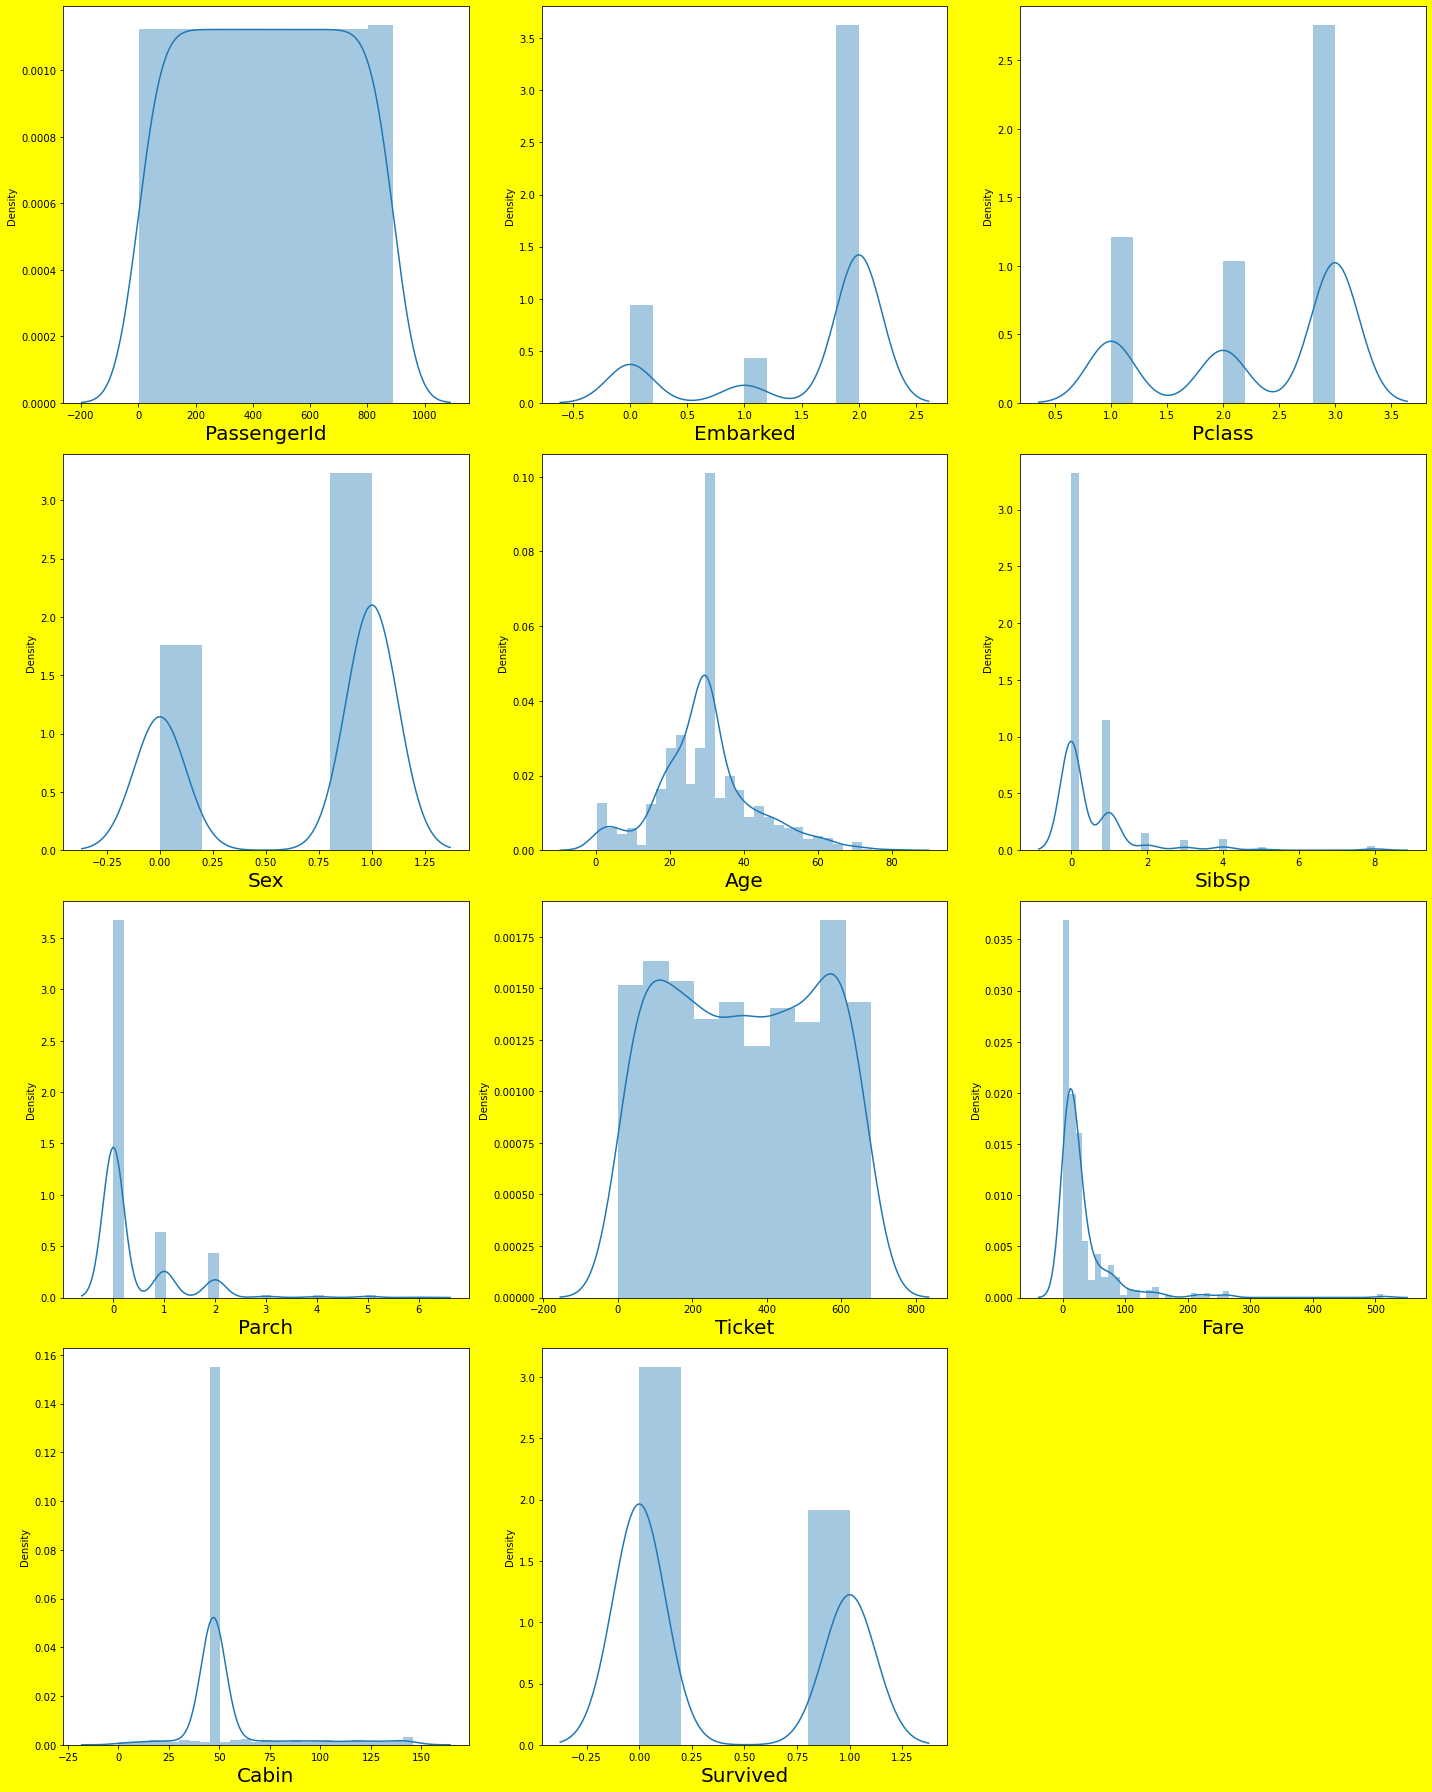

In [268]:
plt.figure(figsize=(20,25), facecolor='yellow')
plotnumber = 1

for column in df:
    if plotnumber <= 11:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
        plotnumber += 1
plt.tight_layout()

In [269]:
df.corr()

,PassengerId,Embarked,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived
PassengerId,1.000000,0.013128,-0.035144,0.042939,0.033207,-0.057527,-0.001652,-0.056554,0.012658,-0.018086,-0.005007
Embarked,0.013128,1.000000,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.001729,-0.224719,0.023804,-0.167675
Pclass,-0.035144,0.162098,1.000000,0.131900,-0.331339,0.083081,0.018443,0.319869,-0.549500,-0.248495,-0.338481
Sex,0.042939,0.108262,0.131900,1.000000,0.084153,-0.114631,-0.245489,0.059372,-0.182333,-0.102643,-0.543351
Age,0.033207,-0.026749,-0.331339,0.084153,1.000000,-0.232625,-0.179191,-0.068848,0.091566,0.056011,-0.069809
SibSp,-0.057527,0.068230,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.079461,0.159651,-0.005539,-0.035322
Parch,-0.001652,0.039798,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.020003,0.216225,0.022682,0.081629
Ticket,-0.056554,-0.001729,0.319869,0.059372,-0.068848,0.079461,0.020003,1.000000,-0.013885,-0.072200,-0.164549
Fare,0.012658,-0.224719,-0.549500,-0.182333,0.091566,0.159651,0.216225,-0.013885,1.000000,0.090516,0.257307
Cabin,-0.018086,0.023804,-0.248495,-0.102643,0.056011,-0.005539,0.022682,-0.072200,0.090516,1.000000,0.175690


<AxesSubplot:>

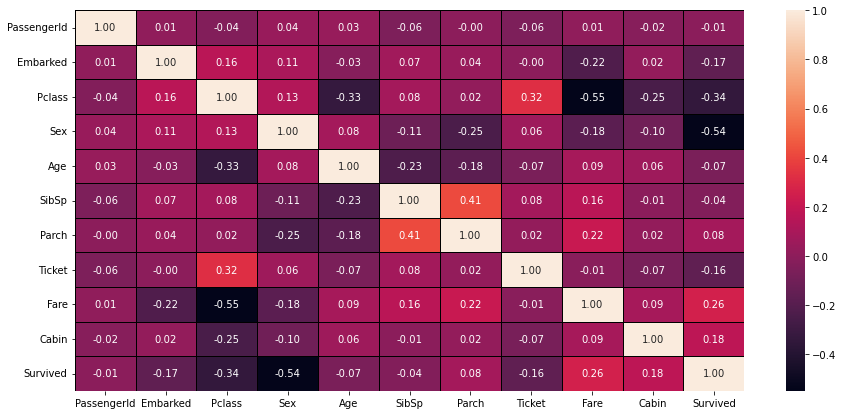

In [270]:
plt.figure(figsize=(15,7))

sns.heatmap(df.corr(), annot=True, linewidth=0.5, linecolor='black', fmt='0.2f')

In [271]:
df.corr()['Survived']

PassengerId   -0.005007
Embarked      -0.167675
Pclass        -0.338481
Sex           -0.543351
Age           -0.069809
SibSp         -0.035322
Parch          0.081629
Ticket        -0.164549
Fare           0.257307
Cabin          0.175690
Survived       1.000000
Name: Survived, dtype: float64

I feel Passenger ID has very less important in the dataset, Droping the same

In [272]:
df

,PassengerId,Embarked,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived
0,1,2,3,1,22.000000,1,0,523,7.2500,47,0
1,2,0,1,0,38.000000,1,0,596,71.2833,81,1
2,3,2,3,0,26.000000,0,0,669,7.9250,47,1
3,4,2,1,0,35.000000,1,0,49,53.1000,55,1
4,5,2,3,1,35.000000,0,0,472,8.0500,47,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,2,1,27.000000,0,0,101,13.0000,47,0
887,888,2,1,0,19.000000,0,0,14,30.0000,30,1
888,889,2,3,0,29.699118,1,2,675,23.4500,47,0
889,890,0,1,1,26.000000,0,0,8,30.0000,60,1


In [273]:
df = df.drop(columns=['PassengerId'], axis=1)

In [274]:
df

,Embarked,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived
0,2,3,1,22.000000,1,0,523,7.2500,47,0
1,0,1,0,38.000000,1,0,596,71.2833,81,1
2,2,3,0,26.000000,0,0,669,7.9250,47,1
3,2,1,0,35.000000,1,0,49,53.1000,55,1
4,2,3,1,35.000000,0,0,472,8.0500,47,0
...,...,...,...,...,...,...,...,...,...,...
886,2,2,1,27.000000,0,0,101,13.0000,47,0
887,2,1,0,19.000000,0,0,14,30.0000,30,1
888,2,3,0,29.699118,1,2,675,23.4500,47,0
889,0,1,1,26.000000,0,0,8,30.0000,60,1


In [275]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [276]:
x.skew()

Embarked   -1.264823
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Ticket      0.000246
Fare        4.787317
Cabin       2.268926
dtype: float64

In [277]:
from sklearn.preprocessing import PowerTransformer, power_transform

In [278]:
x_new = power_transform(x)

In [279]:
pd.DataFrame(x_new, columns=x.columns).skew().sort_values(ascending = False)

Parch       1.228795
SibSp       0.808608
Cabin       0.316911
Age         0.064420
Fare       -0.040329
Ticket     -0.299695
Pclass     -0.441438
Sex        -0.618921
Embarked   -1.064527
dtype: float64

In [280]:
x = pd.DataFrame(x_new, columns=x.columns)
x

,Embarked,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,0.610411,0.863973,0.737695,-0.556267,1.373636,-0.560253,0.906781,-0.878820,-0.193974
1,-1.780520,-1.459129,-1.355574,0.657269,1.373636,-0.560253,1.195448,1.336651,1.252786
2,0.610411,0.863973,-1.355574,-0.241577,-0.679850,-0.560253,1.473071,-0.790065,-0.193974
3,0.610411,-1.459129,-1.355574,0.437923,1.373636,-0.560253,-1.571555,1.067352,0.197333
4,0.610411,0.863973,0.737695,0.437923,-0.679850,-0.560253,0.697470,-0.774439,-0.193974
...,...,...,...,...,...,...,...,...,...
886,0.610411,-0.592604,0.737695,-0.164262,-0.679850,-0.560253,-1.180070,-0.294907,-0.193974
887,0.610411,-1.459129,-1.355574,-0.798775,-0.679850,-0.560253,-1.921742,0.527906,-1.204136
888,0.610411,0.863973,-1.355574,0.042001,1.373636,1.846856,1.495449,0.288885,-0.193974
889,-1.780520,-1.459129,0.737695,-0.241577,-0.679850,-0.560253,-2.002674,0.527906,0.422919


In [281]:
y = pd.DataFrame(y)

In [282]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [283]:
df = pd.concat([x, y], axis=1)
df

,Embarked,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived
0,0.610411,0.863973,0.737695,-0.556267,1.373636,-0.560253,0.906781,-0.878820,-0.193974,0
1,-1.780520,-1.459129,-1.355574,0.657269,1.373636,-0.560253,1.195448,1.336651,1.252786,1
2,0.610411,0.863973,-1.355574,-0.241577,-0.679850,-0.560253,1.473071,-0.790065,-0.193974,1
3,0.610411,-1.459129,-1.355574,0.437923,1.373636,-0.560253,-1.571555,1.067352,0.197333,1
4,0.610411,0.863973,0.737695,0.437923,-0.679850,-0.560253,0.697470,-0.774439,-0.193974,0
...,...,...,...,...,...,...,...,...,...,...
886,0.610411,-0.592604,0.737695,-0.164262,-0.679850,-0.560253,-1.180070,-0.294907,-0.193974,0
887,0.610411,-1.459129,-1.355574,-0.798775,-0.679850,-0.560253,-1.921742,0.527906,-1.204136,1
888,0.610411,0.863973,-1.355574,0.042001,1.373636,1.846856,1.495449,0.288885,-0.193974,0
889,-1.780520,-1.459129,0.737695,-0.241577,-0.679850,-0.560253,-2.002674,0.527906,0.422919,1


Cheking Outliers

KeyError: 'Survived'

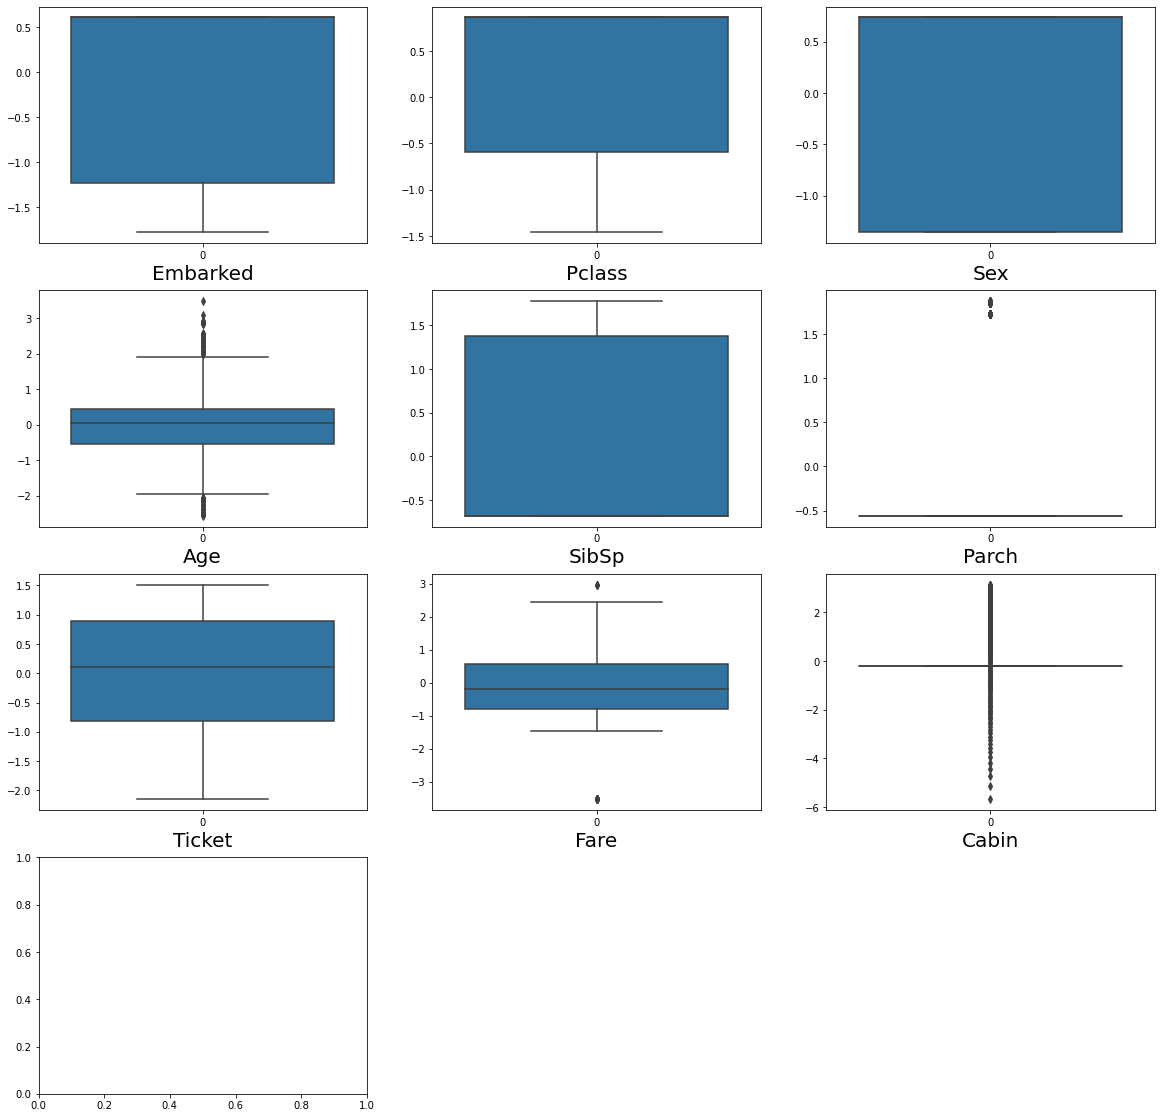

In [284]:
plt.figure(figsize=(20,20))
z=1

for column in df:
    if z <= 10:
        plt.subplot(4,3,z)
        sns.boxplot(data = x[column])
        plt.xlabel(column, fontsize=20)
        z += 1
        
plt.show()
        

In [285]:
from scipy.stats import zscore

In [288]:
(np.abs(zscore(df))<3).all().all()

False

In [289]:
zs = zscore(df)
zs

,Embarked,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived
0,0.610411,0.863973,0.737695,-0.556267,1.373636,-0.560253,0.906781,-0.878820,-0.193974,-0.789272
1,-1.780520,-1.459129,-1.355574,0.657269,1.373636,-0.560253,1.195448,1.336651,1.252786,1.266990
2,0.610411,0.863973,-1.355574,-0.241577,-0.679850,-0.560253,1.473071,-0.790065,-0.193974,1.266990
3,0.610411,-1.459129,-1.355574,0.437923,1.373636,-0.560253,-1.571555,1.067352,0.197333,1.266990
4,0.610411,0.863973,0.737695,0.437923,-0.679850,-0.560253,0.697470,-0.774439,-0.193974,-0.789272
...,...,...,...,...,...,...,...,...,...,...
886,0.610411,-0.592604,0.737695,-0.164262,-0.679850,-0.560253,-1.180070,-0.294907,-0.193974,-0.789272
887,0.610411,-1.459129,-1.355574,-0.798775,-0.679850,-0.560253,-1.921742,0.527906,-1.204136,1.266990
888,0.610411,0.863973,-1.355574,0.042001,1.373636,1.846856,1.495449,0.288885,-0.193974,-0.789272
889,-1.780520,-1.459129,0.737695,-0.241577,-0.679850,-0.560253,-2.002674,0.527906,0.422919,1.266990


In [290]:
abs_zs = np.abs(zs)
abs_zs

,Embarked,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived
0,0.610411,0.863973,0.737695,0.556267,1.373636,0.560253,0.906781,0.878820,0.193974,0
1,1.780520,1.459129,1.355574,0.657269,1.373636,0.560253,1.195448,1.336651,1.252786,1
2,0.610411,0.863973,1.355574,0.241577,0.679850,0.560253,1.473071,0.790065,0.193974,1
3,0.610411,1.459129,1.355574,0.437923,1.373636,0.560253,1.571555,1.067352,0.197333,1
4,0.610411,0.863973,0.737695,0.437923,0.679850,0.560253,0.697470,0.774439,0.193974,0
...,...,...,...,...,...,...,...,...,...,...
886,0.610411,0.592604,0.737695,0.164262,0.679850,0.560253,1.180070,0.294907,0.193974,0
887,0.610411,1.459129,1.355574,0.798775,0.679850,0.560253,1.921742,0.527906,1.204136,1
888,0.610411,0.863973,1.355574,0.042001,1.373636,1.846856,1.495449,0.288885,0.193974,0
889,1.780520,1.459129,0.737695,0.241577,0.679850,0.560253,2.002674,0.527906,0.422919,1


In [292]:
filtering_entry = (abs_zs < 3).all(axis=1)

In [293]:
filtering_entry.sum()

850

In [294]:
df = df[filtering_entry]
df

,Embarked,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived
0,0.610411,0.863973,0.737695,-0.556267,1.373636,-0.560253,0.906781,-0.878820,-0.193974,0
1,-1.780520,-1.459129,-1.355574,0.657269,1.373636,-0.560253,1.195448,1.336651,1.252786,1
2,0.610411,0.863973,-1.355574,-0.241577,-0.679850,-0.560253,1.473071,-0.790065,-0.193974,1
3,0.610411,-1.459129,-1.355574,0.437923,1.373636,-0.560253,-1.571555,1.067352,0.197333,1
4,0.610411,0.863973,0.737695,0.437923,-0.679850,-0.560253,0.697470,-0.774439,-0.193974,0
...,...,...,...,...,...,...,...,...,...,...
886,0.610411,-0.592604,0.737695,-0.164262,-0.679850,-0.560253,-1.180070,-0.294907,-0.193974,0
887,0.610411,-1.459129,-1.355574,-0.798775,-0.679850,-0.560253,-1.921742,0.527906,-1.204136,1
888,0.610411,0.863973,-1.355574,0.042001,1.373636,1.846856,1.495449,0.288885,-0.193974,0
889,-1.780520,-1.459129,0.737695,-0.241577,-0.679850,-0.560253,-2.002674,0.527906,0.422919,1


In [296]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [306]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score

# Logisctics Regression

In [302]:
maxAcc = 0
maxRS = 0

for i in range(1,150):
    x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75, random_state=i)
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    acc=accuracy_score(y_test, y_pred)
    print('accuracy', acc, 'random state',i)
    
    
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
        print('Max Accuracy', maxAcc, 'Max Random State', maxRS)
    


accuracy 0.8169014084507042 random state 1
Max Accuracy 0.8169014084507042 Max Random State 1
accuracy 0.7934272300469484 random state 2
accuracy 0.7887323943661971 random state 3
accuracy 0.812206572769953 random state 4
accuracy 0.7887323943661971 random state 5
accuracy 0.7746478873239436 random state 6
accuracy 0.7934272300469484 random state 7
accuracy 0.8262910798122066 random state 8
Max Accuracy 0.8262910798122066 Max Random State 8
accuracy 0.812206572769953 random state 9
accuracy 0.8497652582159625 random state 10
Max Accuracy 0.8497652582159625 Max Random State 10
accuracy 0.812206572769953 random state 11
accuracy 0.8262910798122066 random state 12
accuracy 0.8262910798122066 random state 13
accuracy 0.8169014084507042 random state 14
accuracy 0.784037558685446 random state 15
accuracy 0.8028169014084507 random state 16
accuracy 0.8403755868544601 random state 17
accuracy 0.7981220657276995 random state 18
accuracy 0.812206572769953 random state 19
accuracy 0.7793427230046

In [307]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75, random_state=103)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
acc=accuracy_score(y_test, y_pred)
print('accuracy', acc)
print('Classification Report \n', classification_report(y_test, y_pred))

accuracy 0.863849765258216
Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       132
           1       0.86      0.77      0.81        81

    accuracy                           0.86       213
   macro avg       0.86      0.84      0.85       213
weighted avg       0.86      0.86      0.86       213



Decision Tree

In [311]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75, random_state=103)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
acc=accuracy_score(y_test, y_pred)
print('accuracy', acc)
print('Classification Report \n', classification_report(y_test, y_pred))

accuracy 0.7981220657276995
Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.84      0.84       132
           1       0.74      0.73      0.73        81

    accuracy                           0.80       213
   macro avg       0.79      0.78      0.79       213
weighted avg       0.80      0.80      0.80       213



Random Forest

In [312]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75, random_state=103)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
acc=accuracy_score(y_test, y_pred)
print('accuracy', acc)
print('Classification Report \n', classification_report(y_test, y_pred))

accuracy 0.8873239436619719
Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       132
           1       0.90      0.79      0.84        81

    accuracy                           0.89       213
   macro avg       0.89      0.87      0.88       213
weighted avg       0.89      0.89      0.89       213



# Decision Tree

In [319]:
maxAcc = 0
maxRS = 0

for i in range(1,150):
    x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75, random_state=i)
    dt.fit(x_train,y_train)
    y_pred = dt.predict(x_test)
    acc=accuracy_score(y_test, y_pred)
    print('accuracy', acc, 'random state',i)
    
    
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
        print('Max Accuracy', maxAcc, 'Max Random State', maxRS)
    


accuracy 0.7605633802816901 random state 1
Max Accuracy 0.7605633802816901 Max Random State 1
accuracy 0.7652582159624414 random state 2
Max Accuracy 0.7652582159624414 Max Random State 2
accuracy 0.7699530516431925 random state 3
Max Accuracy 0.7699530516431925 Max Random State 3
accuracy 0.7276995305164319 random state 4
accuracy 0.784037558685446 random state 5
Max Accuracy 0.784037558685446 Max Random State 5
accuracy 0.7746478873239436 random state 6
accuracy 0.7746478873239436 random state 7
accuracy 0.8169014084507042 random state 8
Max Accuracy 0.8169014084507042 Max Random State 8
accuracy 0.7793427230046949 random state 9
accuracy 0.7699530516431925 random state 10
accuracy 0.7887323943661971 random state 11
accuracy 0.7652582159624414 random state 12
accuracy 0.7887323943661971 random state 13
accuracy 0.7605633802816901 random state 14
accuracy 0.7934272300469484 random state 15
accuracy 0.755868544600939 random state 16
accuracy 0.7652582159624414 random state 17
accuracy 

In [320]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75, random_state=49)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
acc=accuracy_score(y_test, y_pred)
print('accuracy', acc)
print('Classification Report \n', classification_report(y_test, y_pred))

accuracy 0.8309859154929577
Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       132
           1       0.80      0.74      0.77        81

    accuracy                           0.83       213
   macro avg       0.82      0.81      0.82       213
weighted avg       0.83      0.83      0.83       213



Logistics Regression

In [321]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75, random_state=49)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
acc=accuracy_score(y_test, y_pred)
print('accuracy', acc)
print('Classification Report \n', classification_report(y_test, y_pred))

accuracy 0.7887323943661971
Classification Report 
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       132
           1       0.77      0.63      0.69        81

    accuracy                           0.79       213
   macro avg       0.78      0.76      0.77       213
weighted avg       0.79      0.79      0.78       213



Random Forest

In [322]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75, random_state=49)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
acc=accuracy_score(y_test, y_pred)
print('accuracy', acc)
print('Classification Report \n', classification_report(y_test, y_pred))

accuracy 0.8169014084507042
Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       132
           1       0.80      0.69      0.74        81

    accuracy                           0.82       213
   macro avg       0.81      0.79      0.80       213
weighted avg       0.82      0.82      0.81       213



# Random Forest

In [325]:
maxAcc = 0
maxRS = 0

for i in range(1,150):
    x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75, random_state=i)
    rf.fit(x_train,y_train)
    y_pred = rf.predict(x_test)
    acc=accuracy_score(y_test, y_pred)
    print('accuracy', acc, 'random state',i)
    
    
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
        print('Max Accuracy', maxAcc, 'Max Random State', maxRS)
    


accuracy 0.8544600938967136 random state 1
Max Accuracy 0.8544600938967136 Max Random State 1
accuracy 0.8356807511737089 random state 2
accuracy 0.8262910798122066 random state 3
accuracy 0.7887323943661971 random state 4
accuracy 0.8450704225352113 random state 5
accuracy 0.8356807511737089 random state 6
accuracy 0.8028169014084507 random state 7
accuracy 0.8497652582159625 random state 8
accuracy 0.8215962441314554 random state 9
accuracy 0.8403755868544601 random state 10
accuracy 0.8403755868544601 random state 11
accuracy 0.8497652582159625 random state 12
accuracy 0.8356807511737089 random state 13
accuracy 0.8356807511737089 random state 14
accuracy 0.8169014084507042 random state 15
accuracy 0.8309859154929577 random state 16
accuracy 0.8169014084507042 random state 17
accuracy 0.8075117370892019 random state 18
accuracy 0.8544600938967136 random state 19
accuracy 0.8169014084507042 random state 20
accuracy 0.8450704225352113 random state 21
accuracy 0.8450704225352113 random

In [327]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75, random_state=93)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
acc=accuracy_score(y_test, y_pred)
print('accuracy', acc)
print('Classification Report \n', classification_report(y_test, y_pred))

accuracy 0.9014084507042254
Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       133
           1       0.92      0.81      0.86        80

    accuracy                           0.90       213
   macro avg       0.90      0.88      0.89       213
weighted avg       0.90      0.90      0.90       213



Logistics Regrssion

In [328]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75, random_state=93)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
acc=accuracy_score(y_test, y_pred)
print('accuracy', acc)
print('Classification Report \n', classification_report(y_test, y_pred))

accuracy 0.8262910798122066
Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       133
           1       0.77      0.76      0.77        80

    accuracy                           0.83       213
   macro avg       0.82      0.81      0.81       213
weighted avg       0.83      0.83      0.83       213



Decision Tress

In [329]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75, random_state=93)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
acc=accuracy_score(y_test, y_pred)
print('accuracy', acc)
print('Classification Report \n', classification_report(y_test, y_pred))

accuracy 0.7746478873239436
Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.76      0.81       133
           1       0.67      0.80      0.73        80

    accuracy                           0.77       213
   macro avg       0.76      0.78      0.77       213
weighted avg       0.79      0.77      0.78       213



# Cross Validation

In [330]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(rf, x, y, cv=7)
print('Corss Val Score for Random Forest model is', np.mean(scr)*100)

Corss Val Score for Random Forest model is 83.65107321888246


In [331]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(dt, x, y, cv=7)
print('Corss Val Score for Decision Tree model is', np.mean(scr)*100)

Corss Val Score for Decision Tree model is 78.36723634041071


In [332]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(lr, x, y, cv=7)
print('Corss Val Score for Logistic Regression model is', np.mean(scr)*100)

Corss Val Score for Logistic Regression model is 80.11690247159694


As Cross Validation score for Random Forest is more, we will hypertune random forest model

# Hyper Tunning

In [333]:
RandomForestClassifier()

RandomForestClassifier()

In [334]:
from sklearn.model_selection import GridSearchCV
gcv=GridSearchCV

In [335]:
param = {'max_features': ['auto','sqrt','log2'],
         'max_depth':[2,4,5,6,7,8],
         'criterion': ['gini','entropy'],
         'n_estimators' : [100,150,200]
        }

In [336]:
hypt = gcv(rf, param, cv=5, scoring='accuracy')

hypt.fit(x_train,y_train)

hypt.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [337]:
hypt.best_estimator_

RandomForestClassifier(max_depth=7)

In [338]:
hypt.predict = hypt.best_estimator_.predict(x_test)

accuracy_score(y_test, hypt.predict)

0.8779342723004695

# ROC AUC Curve

In [339]:
from sklearn.metrics import plot_roc_curve, auc

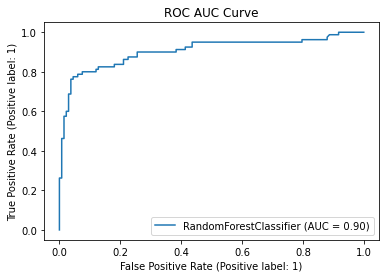

In [340]:
plot_roc_curve(hypt.best_estimator_,x_test, y_test)
plt.title('ROC AUC Curve')
plt.show()